Нормальная форма
c1x1+cnxn->max
a11x1+a12+x2<=и1
ф21x1+a22x2<=b2
и так далее
и на все переменные наложены ограничения неотрицательности

Каноническая
целевая максимизирцется
a11x1+a12x2=b1
равенства крч
на все переменные наложены ограничения неотрицательности

собираем цшки и иксы в вектор

из кэфов в ограничениях сварганим матрицу с названием А

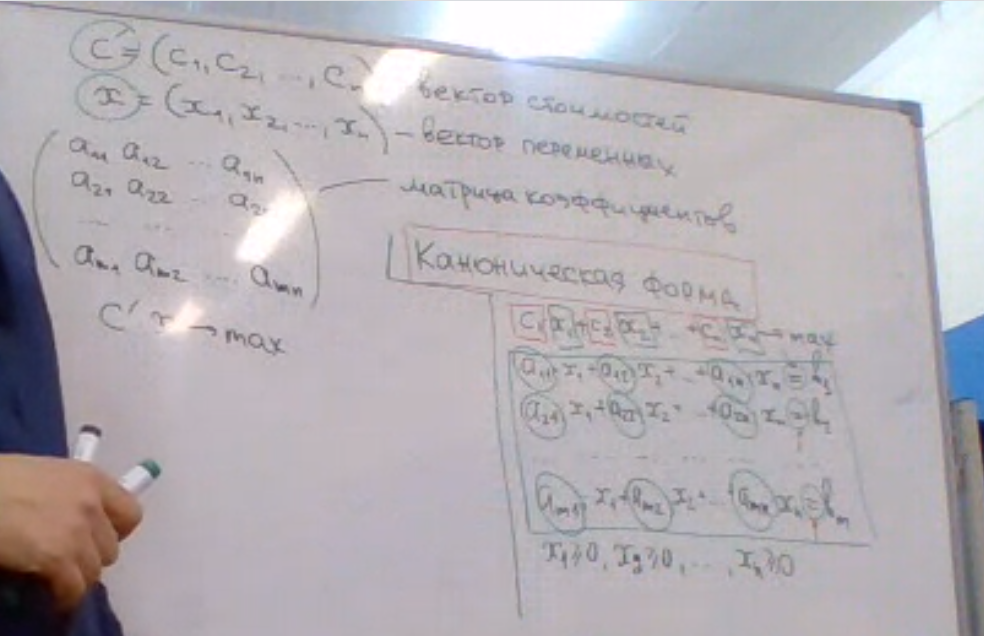

Матрица состоит из m строк и ранг равен m
допустимый план базисный есои найлется множество базисных индексов, где из количество равно m, определитель базисной матрицы не равно 0 и в векторе x, те элементы индексы которых не входят в базисном плане, они должны равнятся 0

In [ ]:
def solve(A_inv, x, k):
  n = len(A_inv)
  k -= 1 # для лучшей индексации
  # ШАГ 1
  l = np.dot(A_inv, x)
  li = l[k] # находим i-ую компоненту вектора l
  if (li == 0): # проверка компоненты на равенство нолю
    return "Матрица не может быть обратимой"
  # ШАГ 2
  l1 = np.copy(l) # получаем вектор l с волной
  l1[k] = -1 # заменяем i-ую компоненту вектора l с волной -1
  # ШАГ 3
  l2 = np.dot(-1/li, l1) # получаем вектор l с шапочкой
  # ШАГ 4
  E = np.eye(n) # создаем единичную матрицу
  Q = np.copy(E)
  #print(l2)
  Q[:,k] = l2.transpose() # создаем матрицу Q
  z = np.eye(n)
  for i in range(n):
    for j in range(n):
      z[i][j] = Q[i][i]*A_inv[i][j]
      if (i != k):
        z[i][j] += Q[i][k]*A_inv[k][j]
  return z

Симплекс метод
2 фазы
начальная проверяет задача ли совместа(есть ли хоть 1 план допустимый)
если задача совместна то в начальной фазе какой-то есть базисный допустимый план, если да то аходим некоторый базисный допустимый план xнач
Основная фаза итеративная, она начинает с базового допустимого плана по енму каким-то образом строится следующий базовый допустимый план новый план должен быть не хуже чем текцщий

In [ ]:
import numpy as np
A=np.array([[2, 1, 1, 0,0,0], [2,7,0,1,0,0], [1,0,0,0,1,0],[0,1,0,0,0,1]])
b = np.array([0,0,0,0])
c = np.array([20,21,0,0,0,1])
x=np.array([0,0,18,42,8,5])
jb=np.array([3,4,5,6])

Итерация 1
составляем базисную матрицу

In [ ]:
Ab=np.array([[1,0,0],[0,1,0],[0,0,1]])

Находим обратную матрицу

In [ ]:
def main_simplex(A, c, x, jb):
  iteration = 0
  while True:
    iteration += 1
    if iteration == 1:
      ab = np.array([np.copy(A[:,i-1]) for i in jb]).transpose()
      A_i = np.linalg.inv(ab)
    else:
      ab[:,position_min_tetta] = A[:, jb[position_min_tetta] - 1]
      A_i = solve(A_i, ab[:,position_min_tetta], position_min_tetta + 1)
    cb = np.array([c[i - 1] for i in jb])
    u = np.dot(cb, A_i)
    delta = np.dot(u, A) -c
    j0=0
    if min(delta) >= 0:
      print("we have optimal plan")
      return x
    while delta[j0]>=0:
      j0 += 1
    z = np.dot(A_i, A[:,j0])
    tetta = [float(x[jb[i] - 1])/float(z[i]) if z[i]> 0 else np.inf for i in range(len(jb))]
    tetta0 = np.min(tetta)
    if tetta0 is np.inf:
      print("целевая функция неограничена на множестве допустимых планов")
    position_min_tetta = np.where(tetta == tetta0)[0][0]
    jb_new = np.copy(jb)
    jb_new[position_min_tetta] = j0 + 1
    x_new = np.copy(x)
    j = 0
    x_new = x_new.astype(np.float64)
    for i in jb:
      x_new[i - 1] = float(x[i - 1]) - tetta0*float(z[j])
      j+=1
    x_new[j0] = tetta0
    x = x_new
    jb = jb_new
    

main_simplex(A,c,x,jb)

we have optimal plan


array([7, 4, 0, 0, 1, 1])

In [ ]:
A=np.array([[5, 4, 1, 0,0,0], [3,7,0,1,0,0], [1,0,0,0,1,0],[0,1,0,0,0,1]])
b = np.array([0,0,0,0])
c = np.array([25,34,1,0,0,0])
x=np.array([0,0,55,56,10,7])
jb=np.array([3,4,5,6])
main_simplex(A,c,x,jb)

we have optimal plan


array([7., 5., 0., 0., 3., 2.])

In [ ]:
A=np.array([[5, 4, 1, 0,0,0], [3,7,0,1,0,0], [1,0,0,0,1,0],[0,1,0,0,0,1]])
b = np.array([0,0,0,0])
c = np.array([25,34,1,0,0,0])
x=np.array([10,1.25,0,17.25,0,5.75])
jb=np.array([2,4,1,6])

In [ ]:
A=np.array([[5, 4, 1, 0,0,0], [3,7,0,1,0,0], [1,0,0,0,1,0],[0,1,0,0,0,1]])
b = np.array([0,0,0,0])
c = np.array([25,34,1,0,0,0])
x=np.array([10,0,5,26,0,7])
jb=np.array([3,4,1,6])

In [ ]:
A_inv=np.linalg.inv(Ab)

строим вектор базимных индексов

In [ ]:
cb=np.array([0,0,0])

вектор потенциалов вектор базисных индексов умножаем на обратную матрицу базисной

In [ ]:
u = np.dot(cb, A_inv)

вектор оценок
вектор потенциалов умножаем на матрицу кэфов и отнимаем вектор стоимости


In [ ]:
delta = np.dot(u,A) - c
print(delta)

[-1. -1.  0.  0.  0.]


Если все не базисные вектора делта, алгос завершает и говорит что все ок
икс будет оптимальным планом, если нет, то выбираем любую базисную компоненту которая отрицательна и индекс запоминаем

In [ ]:
j0=1

строим вектор z - 3 компоненты(ибо столько базисных индексов)
берем матрицу оббратную базисной и умножаем на столбец матрицы а с индексом j0

In [ ]:
z = np.array([-1, 1, 0])

вычисляем тетты tettai = xji(ji базисный индекс)/zi если zi >0 и бесконечность, если она меньше 0

In [ ]:
tetta = np.array([inf, 3, inf])

находим минимум в теттах

In [ ]:
tetta0 = 3

если бесконечность то бан, стоп машина, целевая функция задачи неограничена на множестве допустимых планов

запоминаем индекс на какой тетте минимум, то запоминаем каокй-то базисный индекс на какой тетте минимум т,е второй базисный индекс и это 4ка

второй базисный индекс заменяем на индекс j0

обновляем новый базисный допустимый план, не базсиные компоненты не равны 0
xj0=x1=tetta0
xji<-xji-tetta0*zi

In [ ]:
x = [3, 0, 4, 0, 2]

<center>Asd</center>
